# N-Year Thresholds
The N-Year thresholds, which are defined by Bulletin 70, describe how much precipitation must fall in a given time frame to be classified as an n-year storm.  In this notebook, I take a look at the thresholds themselves

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from datetime import datetime, timedelta
import operator
import matplotlib.pyplot as plt
from collections import namedtuple
%matplotlib inline

In [2]:
# N-Year Storm variables
# These define the thresholds laid out by bulletin 70, and transfer mins and days to hours
n_year_threshes = pd.read_csv('../../n-year/notebooks/data/n_year_definitions.csv')
n_year_threshes = n_year_threshes.set_index('Duration')
dur_str_to_hours = {
    '5-min':0.0833,
    '10-min':0.1667,
    '15-min':15/60.0,
    '30-min':0.5,
    '1-hr':1.0,
    '2-hr':2.0,
    '3-hr':3.0,
    '6-hr':6.0,
    '12-hr':12.0,
    '18-hr':18.0,
    '24-hr':24.0,
    '48-hr':48.0,
    '72-hr':72.0,
    '5-day':5*24.0,
    '10-day':10*24.0
}
n_s = [int(x.replace('-year','')) for x in reversed(list(n_year_threshes.columns.values))]
duration_strs = sorted(dur_str_to_hours.items(), key=operator.itemgetter(1), reverse=False)
n_year_threshes = n_year_threshes.iloc[::-1]
n_year_threshes

,1-year,2-year,5-year,10-year,25-year,50-year,100-year
Duration,,,,,,,
5-min,0.30,0.36,0.46,0.54,0.66,0.78,0.91
10-min,0.55,0.67,0.84,0.98,1.21,1.42,1.67
15-min,0.68,0.82,1.03,1.21,1.49,1.75,2.05
30-min,0.93,1.12,1.41,1.65,2.04,2.39,2.80
1-hr,1.18,1.43,1.79,2.10,2.59,3.04,3.56
2-hr,1.48,1.79,2.24,2.64,3.25,3.82,4.47
3-hr,1.60,1.94,2.43,2.86,3.53,4.14,4.85
6-hr,1.88,2.28,2.85,3.35,4.13,4.85,5.68
12-hr,2.18,2.64,3.31,3.89,4.79,5.62,6.59


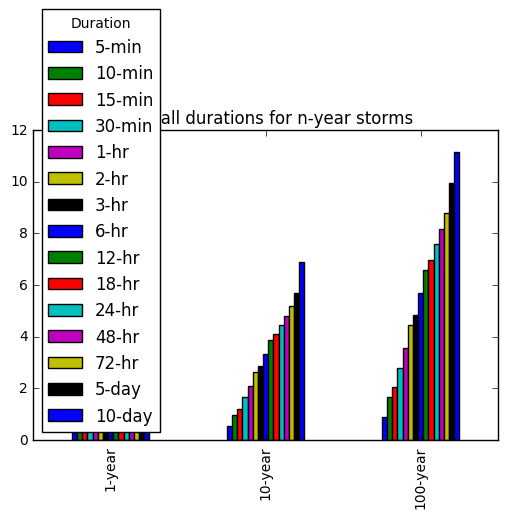

In [6]:
n_year_threshes.transpose().loc[['1-year', '10-year', '100-year']].plot(kind='bar', title='Rainfall durations for n-year storms')

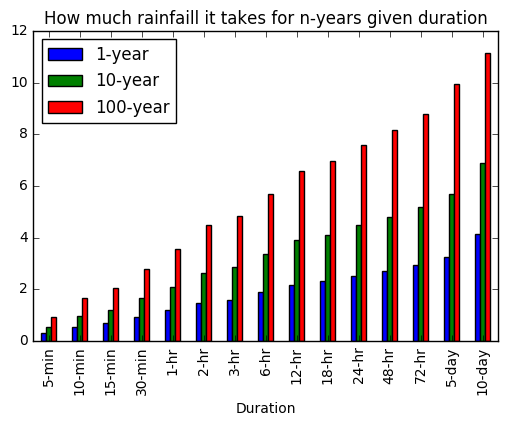

In [7]:
n_year_threshes[['1-year', '10-year', '100-year']].plot(kind='bar', title='How much rainfaill it takes for n-years given duration')

In [8]:
# Convert durations to hours, so that they make more sense on an axis
n_year_threshes['duration'] = n_year_threshes.index.values
def find_duration_hours(duration_str):
    return dur_str_to_hours[duration_str]
n_year_threshes['hours_duration'] = n_year_threshes['duration'].apply(find_duration_hours)
n_year_threshes = n_year_threshes.drop('duration', 1)
n_year_threshes = n_year_threshes.set_index('hours_duration')
n_year_threshes.head()

,1-year,2-year,5-year,10-year,25-year,50-year,100-year
hours_duration,,,,,,,
0.0833,0.30,0.36,0.46,0.54,0.66,0.78,0.91
0.1667,0.55,0.67,0.84,0.98,1.21,1.42,1.67
0.2500,0.68,0.82,1.03,1.21,1.49,1.75,2.05
0.5000,0.93,1.12,1.41,1.65,2.04,2.39,2.80
1.0000,1.18,1.43,1.79,2.10,2.59,3.04,3.56


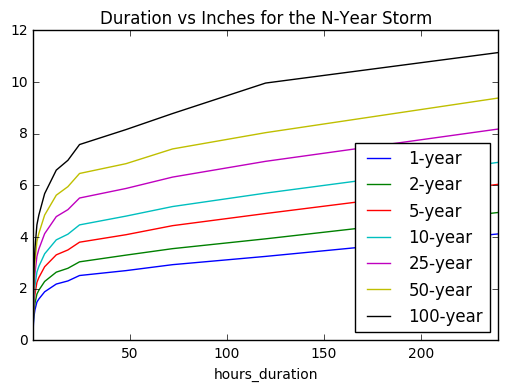

In [9]:
n_year_threshes.plot(kind='line', title='Duration vs Inches for the N-Year Storm')

### We know that 2 inches of rainfall in 10 days ain't bad, but in 1 hour is.  Let's take a look at that relationship, so that we can ask the question -- if we get n inches of rainfall, let's see how fast it must fall to be considered an n-year storm

In [11]:
# This method takes in a number of inches, and plots various durations and how they're classified as n-year storms
# as a bar chart
def inches_to_storm(inches):
    ret_val = []
    thresholds = n_year_threshes.transpose()
    for storm in list(thresholds.index.values):
        the_storm = thresholds.loc[storm]
        storms_higher = the_storm.loc[the_storm > inches]
        if len(storms_higher) == 0:
            continue
        upper_hours = the_storm.loc[the_storm >= inches].index[0]
        upper_inches = the_storm.loc[the_storm >= inches].iloc[0]
        try:
            lower_hours = the_storm.loc[the_storm < inches].iloc[::-1].index[0]
            lower_inches = the_storm.loc[the_storm < inches].iloc[::-1].iloc[0]
        except:
            lower_hours = 0
            lower_inches = 0
        percent_across = (inches-lower_inches) / (upper_inches - lower_inches)
        duration = lower_hours + ((upper_hours - lower_hours) * percent_across)
        ret_val.append({'storm': storm, 'hours': duration})
    ret_val = pd.DataFrame(ret_val)
    ret_val = ret_val.set_index('storm')
    ret_val.plot(kind='bar', title='%s Inches over Duration to Classify the N-Year Storms' % str(inches))

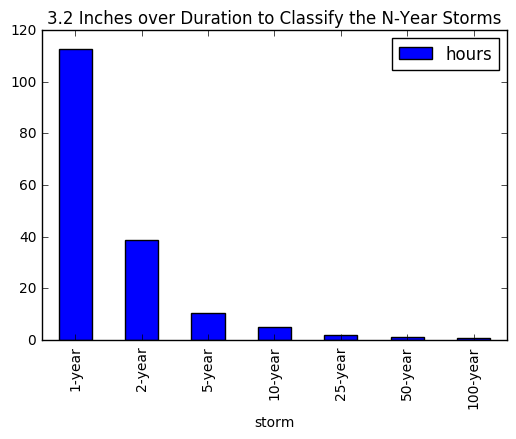

In [12]:
inches_to_storm(3.2)